In [89]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



# Specify each path

In [90]:
#dataset = 'model/keypoint_classifier/keypoint.csv'
dataset = pd.read_csv('asl_landmarks_dataset.csv', header=None)
y_dataset = dataset.iloc[:, 0]
X_dataset = dataset.iloc[:, 1:]


model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [91]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_dataset_encoded = encoder.fit_transform(y_dataset)


In [92]:

X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset_encoded, test_size=0.25, random_state=42
)


# Set number of classes

In [93]:
 #NUM_CLASSES = 26

# Dataset reading

In [94]:
#X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [95]:
#y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [96]:
#X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [97]:
#model = tf.keras.models.Sequential([
    #tf.keras.layers.Input((21 * 2, )),
  #  tf.keras.layers.BatchNormalization(),
   # tf.keras.layers.Dense(128, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #  tf.keras.layers.Dropout(0.5),
   # tf.keras.layers.Dense(64, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
   # tf.keras.layers.Dropout(0.5),
  #  tf.keras.layers.Dense(32, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
   # tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#])


In [98]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')  # <-- Automatically 26 classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_5           │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,148 (211.52 KB)

 Trainable params: 54,064 (211.19 KB)

 Non-trainable params: 84 (336.00 B)

In [99]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/100
1400/1400 - 3s - 2ms/step - accuracy: 0.8035 - loss: 0.6358 - val_accuracy: 0.9707 - val_loss: 0.1209
Epoch 2/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9183 - loss: 0.2599 - val_accuracy: 0.9545 - val_loss: 0.1376
Epoch 3/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9292 - loss: 0.2251 - val_accuracy: 0.9766 - val_loss: 0.0860
Epoch 4/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9355 - loss: 0.2027 - val_accuracy: 0.9772 - val_loss: 0.0769
Epoch 5/100
1400/1400 - 2s - 2ms/step - accuracy: 0.9413 - loss: 0.1851 - val_accuracy: 0.9855 - val_loss: 0.0630
Epoch 6/100
1400/1400 - 2s - 2ms/step - accuracy: 0.9435 - loss: 0.1775 - val_accuracy: 0.9788 - val_loss: 0.0665
Epoch 7/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9448 - loss: 0.1707 - val_accuracy: 0.9822 - val_loss: 0.0631
Epoch 8/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9465 - loss: 0.1666 - val_accuracy: 0.9773 - val_loss: 0.0703
Epoch 9/100
1400/1400 - 2s - 1ms/step - accuracy: 0.9495 - loss: 0.1553 - val_accuracy: 

In [100]:
#model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

In [101]:
# Model checkpoint callback
#cp_callback = tf.keras.callbacks.ModelCheckpoint(
    #model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
#es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [102]:
# Model compilation
#model.compile(
    #optimizer='Adam',
    #loss='sparse_categorical_crossentropy',
   # metrics=['accuracy']
#)

In [103]:
model.save('new_hand_model.h5')


# Model training

In [104]:
#model.fit(
   # X_train,
   # y_train,
    #epochs=1000,
   # batch_size=128,
    #validation_data=(X_test, y_test),
   # callbacks=[cp_callback, es_callback]
#)

In [105]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9925 - loss: 0.0317
Validation Accuracy: 99.25%


In [106]:
# Loading the saved model
#model = tf.keras.models.load_model(model_save_path)

In [107]:
# Inference test
#predict_result = model.predict(np.array([X_test[0]]))

#print(np.squeeze(predict_result))
#print(np.argmax(np.squeeze(predict_result)))

# Confusion matrix

467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


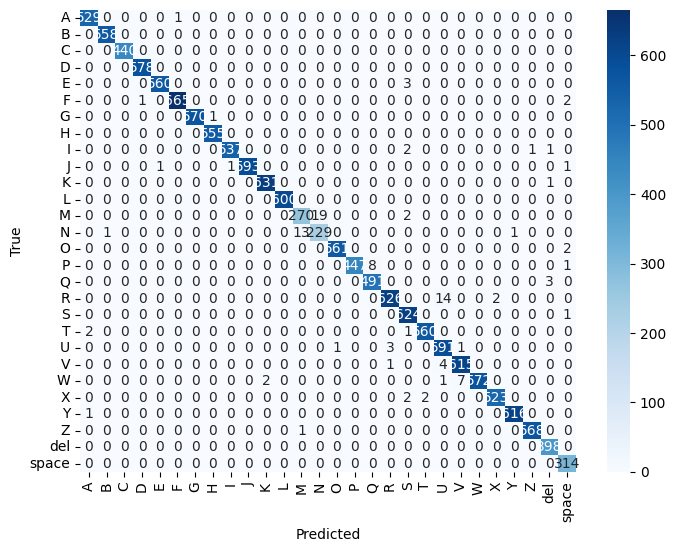

In [108]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Predict on test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, encoder.classes_)


# Convert to model for Tensorflow-Lite

In [109]:
# Save as a model dedicated to inference
#model.save('keypoint_classifier.h5')

#model.save('new_hand_model.h5')


In [110]:
# Transform model (quantization)

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#tflite_quantized_model = converter.convert()

#open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference test

In [111]:
#interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
#interpreter.allocate_tensors()

In [112]:
# Get I / O tensor
#input_details = interpreter.get_input_details()
#output_details = interpreter.get_output_details()

In [113]:
#interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [114]:
#%%time
# Inference implementation
#interpreter.invoke()
#tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [115]:
#print(np.squeeze(tflite_results))
#print(np.argmax(np.squeeze(tflite_results)))